In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
source = "https://namu.wiki/w/K.K."

In [3]:
req = requests.get(source)
html = req.content
soup = BeautifulSoup(html, 'lxml')
content_table = soup.find(name="article")

content_paragraphs = content_table.find_all(name="div", attrs={"class":"wiki-heading-content"})

content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text.replace("\n", " "))

content_corpus_list.pop()
content_corpus = "".join(content_corpus_list)

print(content_corpus)


동물의 숲 시리즈에서 등장하는 잭 러셀 테리어 종의 개이며, 동숲 세계관에서 유명하고 인기 많은 뮤지션 (싱어송라이터) 이다. 그래서 동물 주민이나 플레이어들도 K.K.의 음악만 듣고 있을 정도다. 초기작부터 등장했으며, 짱구처럼 굵은 눈썹과 멍한 눈을 가졌다. 디제잉을 할 때 안경을 쓰고 있는데 눈썹이랑 겹쳐져서 꼭 인상쓰는 것처럼 보인다. 어째서인지 앨범 표지 촬영할 때만 옷을 입고 평상시에는 스누피처럼 옷을 안 걸치고 있다.동물의 숲 시리즈의 음악 제작자이자 이 캐릭터의 성우인 토타카 카즈미를 모티브로 하여서 토타케케도 토타카 카즈미의 실제 별명이고, 얼굴도 따왔다.일본판 이름은 단순히 토타카에서 따온 토타케케(トタケケ/とたけけ[1]), 줄여서 케케라 불리며, 영어 이름은 K. K. Slider[2]다. K.K.를 일본어 발음으로 하면 "케케"라는 점을 의도한 듯하다. 특이하게 한국어 명칭은 일본판과 영어판을 둘 다 따라가지 않은 T.K.였는데, TotaKeke가 아니냐는 설이 있다. 모여봐요 동물의 숲부터 글로벌판을 따라 K.K.로 변경되었다. 다만 놀러오세요 동물의 숲부터 쭉 T.K.를 사용해왔기 때문에 국내 플레이어들 사이에서 변경된 이름에 대한 호불호가 갈리는 중, 그래서 그냥 T.K라고 하는 사람들도 많다.카페의 마스터와 더불어 개인기에 일절 반응을 하지 않는 둘 뿐인 동물이다.동물의 숲 초기 3부작에서는 철도역에서 노래를 불러주고, 놀동숲, 타동숲부턴 토요일 저녁 7시에 나타나 커피숍 비둘기 둥지에서 8시부터 12시까지 노래를 들려주고, 튀동숲에서는 요일과 시간은 동일하며 클럽에서 라이브 타임을 가진다. 엔딩이 딱히 존재하지 않는 이 게임의 특성상 이 순간 스텝롤을 볼 수 있다. 후속작들에서도 이는 동일하다. K.K.가 들려주는 건 기타 소리, 휘파람 소리, 기타 두드리는 소리, 약간의 비트박스, 아무 음절이나 이어붙인 가사 정도지만 들은 플레이어는 대부분 그 목소리에 홀려 토요일 저녁이 되면 K.K.의 노래를 들으러 간다. 음높이에 따라 정해

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣 K+.]+')
    result = hangul.sub('', text)
    return result

content_corpus = text_cleaning(content_corpus)

In [5]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

print(remove_char_counter)

NameError: name 'remove_char_counter' is not defined

In [6]:
korean_stopwords_path = './korean_stopwords.txt'

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [7]:
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', ' 모든', '사용', '매우', '가장', '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', ' 이후', '사실', '생각', '인물', '이름', '년월', '가끔', '거나', '존재', '로만']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)


In [8]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1 and count[x] > 1 and x not in stopwords})

print(remove_char_counter)

Counter({'노래': 12, '동물': 11, '라이브': 9, '가사': 7, '플레이어': 6, '음악': 6, '페이크': 6, '등장': 5, '타카': 5, '동숲': 4, '토요일': 4, '클럽': 4, '소리': 4, '마을': 4, '튀동숲': 3, '게임': 3, '스매시': 3, '시리즈': 2, '초기': 2, '눈썹': 2, '카즈미': 2, '토타케케': 2, '케케': 2, '영어': 2, '발음': 2, '변경': 2, '국내': 2, '저녁': 2, '대부분': 2, '목소리': 2, '믹싱': 2, '멜로디': 2, '이사': 2, '아이템': 2, '음반': 2, '제목': 2, '기간': 2, '한정': 2, '설치': 2, '감상': 2, '버전': 2, '연주': 2, '영상': 2, '브라더스': 2, '스테이지': 2, '사운드': 2, '테스트': 2, '하우스': 2, '모션': 2})


In [14]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

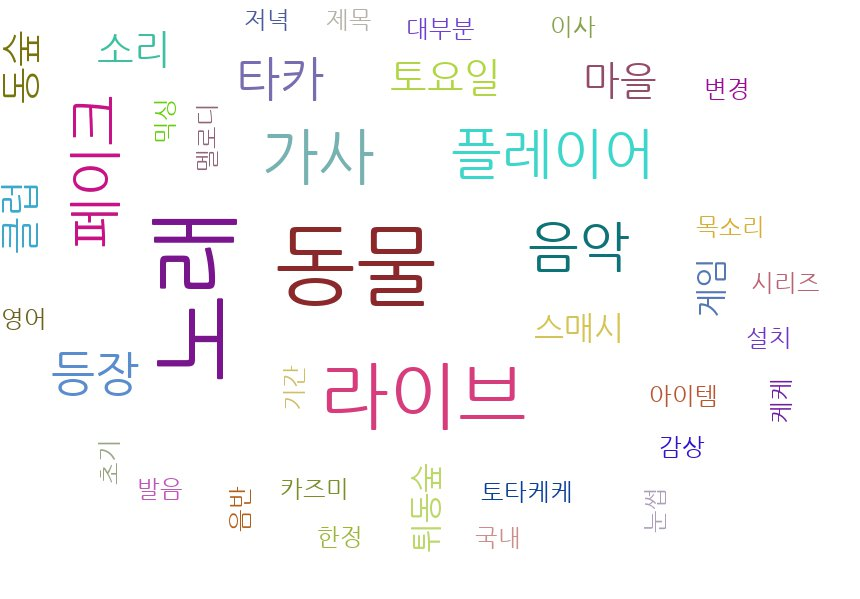

In [15]:
from IPython.display import Image
Image(filename='wordcloud.jpg')